# Models

Build models to see how much each feature contributes to productivity

- Models
    - LinearRegression
    - ExplainableBoostingRegressor
- Features
    - Education
    - Population
    - R&D Expenditure
    
## Feature Engineering

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [31]:
# See: ../src/data/make_dataset.py
df = pd.read_csv('../data/interim/dataset.csv')
print(df['year'].unique())
df.head()

[2010 2011]


,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,fertility_rate,education_funding
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.2
1,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,74.0
2,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,3.9
3,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.8
4,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,73.4


## Add Trends

There are several ways to capture trends.

- Move data to n years (`shift`)
- Take the mean of n years
- ...

In [33]:
features = ['education', 'population', 'rd_expenditure', 'fertility_rate', 'education_funding']
shift_range = [1, 2]

def add_trends(df):
    for feature in features:
        for shift in shift_range:
            df[f'{feature}_shift_{shift}'] = df.sort_values('year').groupby(['GEO'])[feature].shift(shift)
            df[f'{feature}_diff_{shift}'] = df[feature] - df[f'{feature}_shift_{shift}']

add_trends(df)
df.head()

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,fertility_rate,education_funding,education_shift_1,...,rd_expenditure_shift_2,rd_expenditure_diff_2,fertility_rate_shift_1,fertility_rate_diff_1,fertility_rate_shift_2,fertility_rate_diff_2,education_funding_shift_1,education_funding_diff_1,education_funding_shift_2,education_funding_diff_2
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,74.0,48.457143,...,2.06,0.0,1.86219,0.0,1.86219,0.0,3.9,70.1,22.8,51.2
2,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,3.9,48.457143,...,2.06,0.0,1.86219,0.0,1.86219,0.0,22.8,-18.9,73.4,-69.5
3,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.8,48.457143,...,2.06,0.0,1.86219,0.0,1.86219,0.0,73.4,-50.6,3.9,18.9
4,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,73.4,48.457143,...,2.06,0.0,1.86219,0.0,1.86219,0.0,3.9,69.5,94.8,-21.4


## Add Aggregation Features

In [34]:
agg_params = {}
for feature in features:
    for shift in shift_range:
        agg_params[f'{feature}_shift_{shift}_mean'] = (f'{feature}_shift_{shift}', 'mean')

agg = df.groupby('year').agg(**agg_params).reset_index()
df = df.merge(agg, on='year')
df.head()

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,fertility_rate,education_funding,education_shift_1,...,education_shift_1_mean,education_shift_2_mean,population_shift_1_mean,population_shift_2_mean,rd_expenditure_shift_1_mean,rd_expenditure_shift_2_mean,fertility_rate_shift_1_mean,fertility_rate_shift_2_mean,education_funding_shift_1_mean,education_funding_shift_2_mean
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.2,NaN,...,55.386037,55.439224,1.657605e+07,1.664226e+07,1.482857,1.486757,1.630935,1.631814,43.113825,40.845946
1,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,74.0,48.457143,...,55.386037,55.439224,1.657605e+07,1.664226e+07,1.482857,1.486757,1.630935,1.631814,43.113825,40.845946
2,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,3.9,48.457143,...,55.386037,55.439224,1.657605e+07,1.664226e+07,1.482857,1.486757,1.630935,1.631814,43.113825,40.845946
3,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.8,48.457143,...,55.386037,55.439224,1.657605e+07,1.664226e+07,1.482857,1.486757,1.630935,1.631814,43.113825,40.845946
4,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,73.4,48.457143,...,55.386037,55.439224,1.657605e+07,1.664226e+07,1.482857,1.486757,1.630935,1.631814,43.113825,40.845946


In [35]:
for feature in features:
    for shift in shift_range:
        df[f'{feature}_shift_{shift}_mean_diff'] = df[f'{feature}_shift_{shift}'] - df[f'{feature}_shift_{shift}_mean']
df.head()

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,fertility_rate,education_funding,education_shift_1,...,education_shift_1_mean_diff,education_shift_2_mean_diff,population_shift_1_mean_diff,population_shift_2_mean_diff,rd_expenditure_shift_1_mean_diff,rd_expenditure_shift_2_mean_diff,fertility_rate_shift_1_mean_diff,fertility_rate_shift_2_mean_diff,education_funding_shift_1_mean_diff,education_funding_shift_2_mean_diff
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,74.0,48.457143,...,-6.928894,-6.982081,-5.736144e+06,-5.802352e+06,0.577143,0.573243,0.231255,0.230376,-39.213825,-18.045946
2,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,3.9,48.457143,...,-6.928894,-6.982081,-5.736144e+06,-5.802352e+06,0.577143,0.573243,0.231255,0.230376,-20.313825,32.554054
3,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.8,48.457143,...,-6.928894,-6.982081,-5.736144e+06,-5.802352e+06,0.577143,0.573243,0.231255,0.230376,30.286175,-36.945946
4,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,73.4,48.457143,...,-6.928894,-6.982081,-5.736144e+06,-5.802352e+06,0.577143,0.573243,0.231255,0.230376,-39.213825,53.954054


## Scale Features

In [36]:
all_features = [
    'education_shift_1',
    'education_shift_1_mean_diff',
    'education_diff_1',
    'education_shift_2',
    'education_shift_2_mean_diff',
    'education_diff_2',
    'population_shift_1',
    'population_shift_1_mean_diff',
    'population_diff_1',
    'population_shift_2',
    'population_shift_2_mean_diff',
    'population_diff_2',
    'rd_expenditure_shift_1',
    'rd_expenditure_shift_1_mean_diff',
    'rd_expenditure_diff_1',
    'rd_expenditure_shift_2',
    'rd_expenditure_shift_2_mean_diff',
    'rd_expenditure_diff_2',
    'fertility_rate_shift_1',
    'fertility_rate_shift_1_mean_diff',
    'fertility_rate_diff_1',
    'fertility_rate_shift_2',
    'fertility_rate_shift_2_mean_diff',
    'fertility_rate_diff_2',
    'education_funding_shift_1',
    'education_funding_shift_1_mean_diff',
    'education_funding_diff_1',
    'education_funding_shift_2',
    'education_funding_shift_2_mean_diff',
    'education_funding_diff_2',
]

def scale(df):
    for column in all_features:
        scaler = MinMaxScaler()
        df[column] = scaler.fit_transform(df[[column]])

scale(df)
df.head()

,year,GEO,per_hour_worked,per_employee,education,population,rd_expenditure,fertility_rate,education_funding,education_shift_1,...,education_shift_1_mean_diff,education_shift_2_mean_diff,population_shift_1_mean_diff,population_shift_2_mean_diff,rd_expenditure_shift_1_mean_diff,rd_expenditure_shift_2_mean_diff,fertility_rate_shift_1_mean_diff,fertility_rate_shift_2_mean_diff,education_funding_shift_1_mean_diff,education_funding_shift_2_mean_diff
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,74.0,0.285349,...,0.318004,0.311659,0.129052,0.128948,0.524175,0.522361,0.619632,0.622944,0.038122,0.245047
2,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,3.9,0.285349,...,0.318004,0.311659,0.129052,0.128948,0.524175,0.522361,0.619632,0.622944,0.222867,0.739874
3,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,22.8,0.285349,...,0.318004,0.311659,0.129052,0.128948,0.524175,0.522361,0.619632,0.622944,0.717477,0.060221
4,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06,1.86219,73.4,0.285349,...,0.318004,0.311659,0.129052,0.128948,0.524175,0.522361,0.619632,0.622944,0.038122,0.949148


## Split Dataset

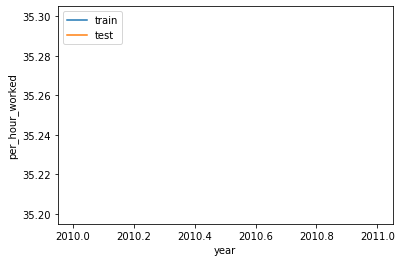

train shape: (249, 49), test shape: (249, 49)


In [37]:
train_size = 0.7

years = df['year'].unique()
years = sorted(years)
pivot = int(len(years) * train_size)
train_index = years[:pivot]
test_index = years[pivot:]

train_df = df[df['year'].isin(train_index)]
test_df = df[df['year'].isin(test_index)]

train_temp = train_df[train_df['GEO'] == 'Denmark']
test_temp = test_df[test_df['GEO'] == 'Denmark']
sns.lineplot(data=train_temp, x='year', y='per_hour_worked', label='train')
sns.lineplot(data=test_temp, x='year', y='per_hour_worked', label='test')
plt.show()

print(f'train shape: {train_df.shape}, test shape: {test_df.shape}')

In [38]:
# train_df = pd.read_csv('../data/interim/train.csv')
# test_df = pd.read_csv('../data/interim/test.csv')
# train_df.head()

## Visualization for Train Dataset

- Correlation
- jointplot
- pairplot

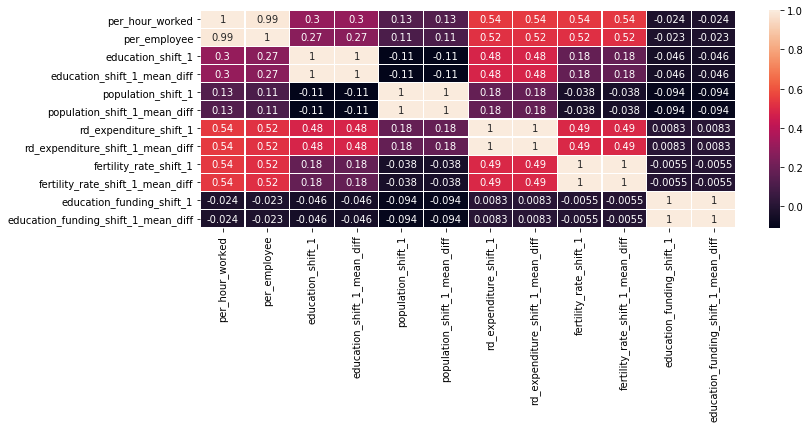

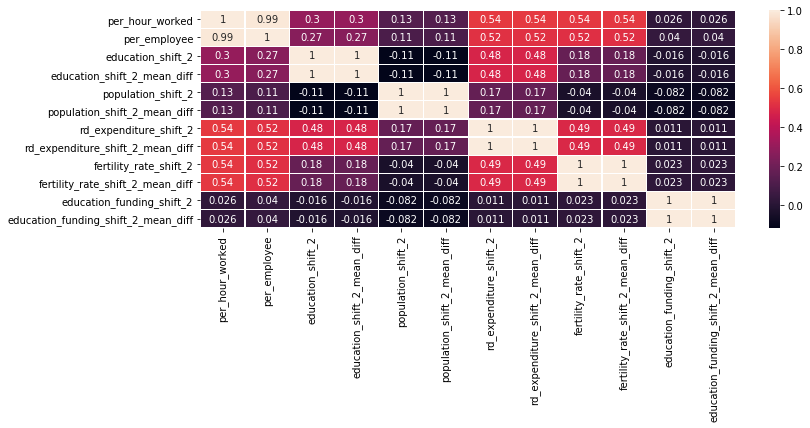

In [39]:
features = [
    [
        'education_shift_1',
        'education_shift_1_mean_diff',
        'population_shift_1',
        'population_shift_1_mean_diff',
        'rd_expenditure_shift_1',
        'rd_expenditure_shift_1_mean_diff',
        'fertility_rate_shift_1',
        'fertility_rate_shift_1_mean_diff',
        'education_funding_shift_1',
        'education_funding_shift_1_mean_diff',
    ],
    [
        'education_shift_2',
        'education_shift_2_mean_diff',
        'population_shift_2',
        'population_shift_2_mean_diff',
        'rd_expenditure_shift_2',
        'rd_expenditure_shift_2_mean_diff',
        'fertility_rate_shift_2',
        'fertility_rate_shift_2_mean_diff',
        'education_funding_shift_2',
        'education_funding_shift_2_mean_diff',
    ],
]

for fs in features:
    corr = train_df[
        ['per_hour_worked', 'per_employee'] + fs
    ].corr()
    plt.figure(figsize=(12,4))
    sns.heatmap(corr, annot=True, linewidths=0.2)
    plt.show()

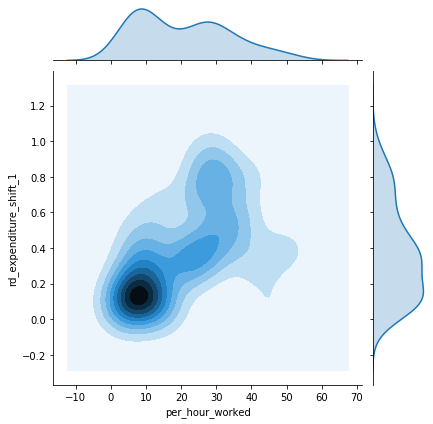

In [10]:
sns.jointplot(data=train_df, x='per_hour_worked', y='rd_expenditure_shift_1', kind='kde')

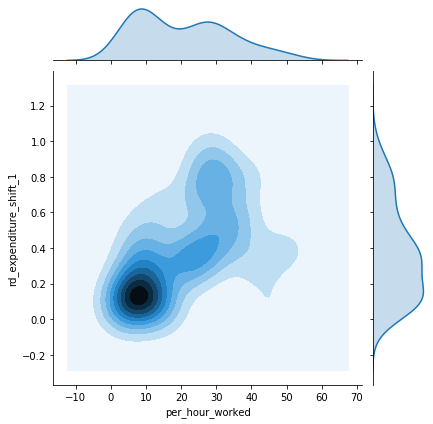

In [11]:
sns.jointplot(data=train_df, x='per_hour_worked', y='rd_expenditure_shift_1', kind='kde')

# Train Models

Train models to predict compensation (productivity) using past data.

## LinearRegression

$$
y = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$

,features,error,train?
0,"education_shift_1, population_shift_1, rd_expe...",9.061757,train
2,"education_shift_2, population_shift_2, rd_expe...",9.063239,train
4,"population_shift_1, education_shift_1, rd_expe...",9.063239,train
3,"education_shift_2, population_shift_2, rd_expe...",9.957370,test
1,"education_shift_1, population_shift_1, rd_expe...",9.983155,test
5,"population_shift_1, education_shift_1, rd_expe...",9.993726,test


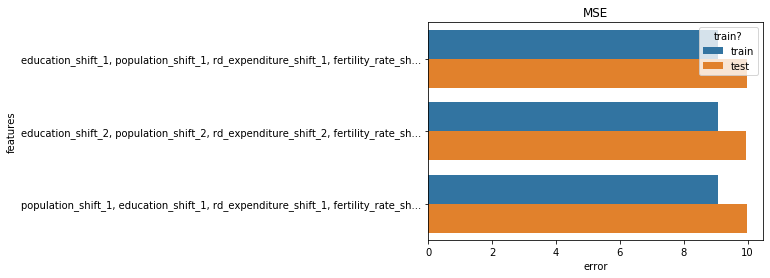

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit(features):
    train_temp = train_df[features + ['per_hour_worked']].dropna()
    test_temp = test_df[features + ['per_hour_worked']].dropna()
    x_train, y_train = train_temp[features], train_temp[['per_hour_worked']]
    x_test, y_test = test_temp[features], test_temp[['per_hour_worked']]
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    train_error = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
    test_error = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    return train_error, test_error

features = [
    ['education_shift_1', 'population_shift_1', 'rd_expenditure_shift_1', 'fertility_rate_shift_1', 'education_funding_shift_1'],
    ['education_shift_2', 'population_shift_2', 'rd_expenditure_shift_2', 'fertility_rate_shift_2', 'education_funding_shift_2'],
    ['population_shift_1', 'education_shift_1', 'rd_expenditure_shift_1', 'fertility_rate_shift_1', 'education_funding_shift_2'],
]

rows = []
for fs in features:
    train_error, test_error = fit(fs)
    feature_name = ', '.join(fs)
    if len(feature_name) > 80:
        feature_name = feature_name[:80] + '...'
    rows.append({
        'features': feature_name,
        'error': train_error,
        'train?': 'train'
    })
    rows.append({
        'features': feature_name,
        'error': test_error,
        'train?': 'test'
    })
    
result = pd.DataFrame(rows).sort_values(by='error')
display(result)

sns.barplot(data=result, x='error', y='features', hue='train?').set_title('MSE')
plt.show()

In [56]:
columns_to_fit = ['education_shift_2', 'population_shift_2', 'rd_expenditure_shift_2', 'fertility_rate_shift_2', 'education_funding_shift_2']
train_temp = train_df[columns_to_fit + ['per_hour_worked']].dropna()
test_temp = test_df[columns_to_fit + ['per_hour_worked']].dropna()
x_train, y_train = train_temp[columns_to_fit], train_temp[['per_hour_worked']]
x_test, y_test = test_temp[columns_to_fit], test_temp[['per_hour_worked']]

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## LightGBM

This is a kind of gradient boosting tree.

GitHub: https://github.com/microsoft/LightGBM

In [43]:
import shap
shap.initjs()

In [44]:
from lightgbm import LGBMRegressor

train_temp = train_df[all_features + ['per_hour_worked']].dropna()
test_temp = test_df[all_features + ['per_hour_worked']].dropna()
x_train, y_train = train_temp[all_features], train_temp[['per_hour_worked']]
x_test, y_test = test_temp[all_features], test_temp[['per_hour_worked']]

gbm = LGBMRegressor()
gbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Tune LightGBM using Optuna

Optuna employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.

Paper: https://arxiv.org/abs/1907.10902
GitHub: https://github.com/optuna/optuna

In [45]:
import lightgbm as lgb
import optuna

def objective(trial):
    param = {
        "objective": "regression",
        "metric": "l2",
        "verbosity": 0,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
    }

    dtrain = lgb.Dataset(x_train, label=y_train)
    gbm = lgb.train(param, dtrain)
    error = np.sqrt(mean_squared_error(y_test, gbm.predict(x_test)))
    return error

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print(" {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 5.20325877612321
  Params: 
 lambda_l1: 2.8099468450283823e-05
 lambda_l2: 0.019601744935902336
 num_leaves: 20
 feature_fraction: 0.45245398428652783
 bagging_fraction: 0.9942827175445902
 bagging_freq: 4
 min_child_samples: 7


In [46]:
dtrain = lgb.Dataset(x_train, label=y_train)
params = trial.params
params['objective'] = 'regression'
tuned_gbm = lgb.train(params, dtrain)
error = np.sqrt(mean_squared_error(y_test, tuned_gbm.predict(x_test)))
error

5.20325877612321

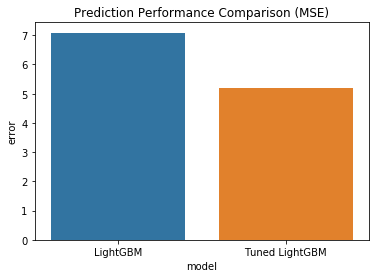

In [47]:
rows = []
rows.append({
    'model': 'LightGBM',
    'error': np.sqrt(mean_squared_error(y_test, gbm.predict(x_test))),
})
rows.append({
    'model': 'Tuned LightGBM',
    'error': np.sqrt(mean_squared_error(y_test, tuned_gbm.predict(x_test))),
})
result = pd.DataFrame(rows).sort_values('error', ascending=False)
sns.barplot(data=result, x='model', y='error').set_title('Prediction Performance Comparison (MSE)')
plt.show()

# Visualize Predictions

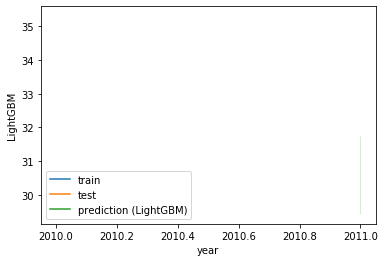

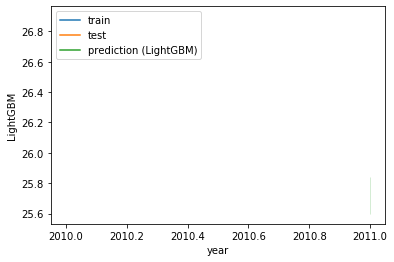

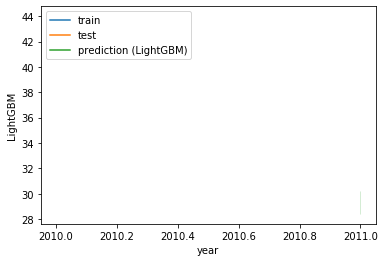

In [51]:
def visualize_prediction(country):
    train_temp = train_df[train_df['GEO'] == country]
    test_temp = test_df[all_features + ['per_hour_worked', 'year', 'GEO']].dropna()
    test_temp = test_temp[test_temp['GEO'] == country]
    x_test, y_test = test_temp[all_features], test_temp[['per_hour_worked']]

    test_temp['LightGBM'] = tuned_gbm.predict(x_test)

    sns.lineplot(data=train_temp, x='year', y='per_hour_worked', label='train')
    sns.lineplot(data=test_temp, x='year', y='per_hour_worked', label='test')
    sns.lineplot(data=test_temp, x='year', y='LightGBM', label='prediction (LightGBM)')
    plt.show()

for country in ['Denmark']:
    visualize_prediction(country)

# Visualize Feature Importance

- Coefficients (LinearRegression)
- Feature Importances (Booster)
- Shap (LightBGM)
  - Paper: http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions
  - GitHub: https://github.com/slundberg/shap
- InterpretML (ExplainableBoostingRegressor)
  - GitHub: https://github.com/interpretml/interpret

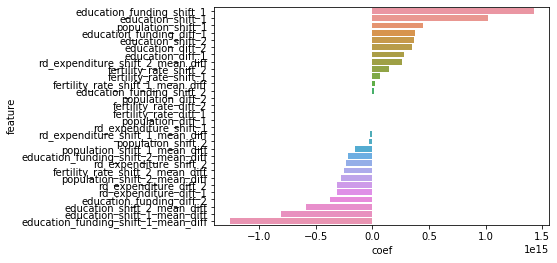

In [52]:
train_temp = train_df[all_features + ['per_hour_worked']].dropna()
test_temp = test_df[all_features + ['per_hour_worked']].dropna()
x_train, y_train = train_temp[all_features], train_temp[['per_hour_worked']]
x_test, y_test = test_temp[all_features], test_temp[['per_hour_worked']]

lr = LinearRegression()
lr.fit(x_train, y_train)

result = pd.DataFrame({
    'feature': all_features,
    'coef': lr.coef_[0]
}).sort_values(by=['coef'], ascending=False)
sns.barplot(data=result, y='feature', x='coef')

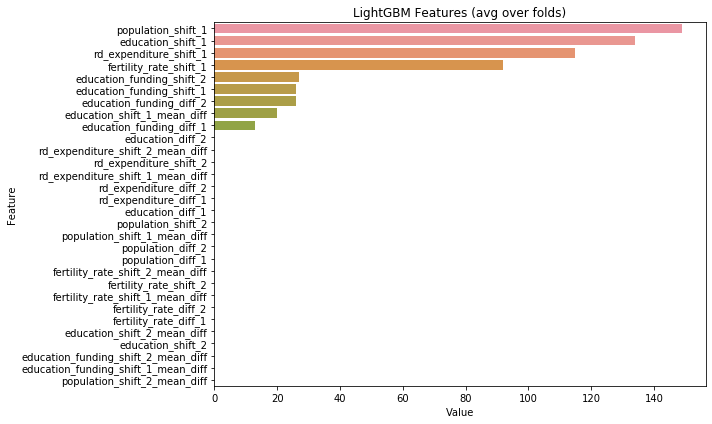

In [53]:
feature_importances = pd.DataFrame(sorted(zip(gbm.feature_importances_, all_features)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importances.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [22]:
explainer = shap.TreeExplainer(tuned_gbm)
shap_values = explainer.shap_values(x_test)

shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:])

/usr/local/lib/python3.7/site-packages/shap/explainers/tree.py:114: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



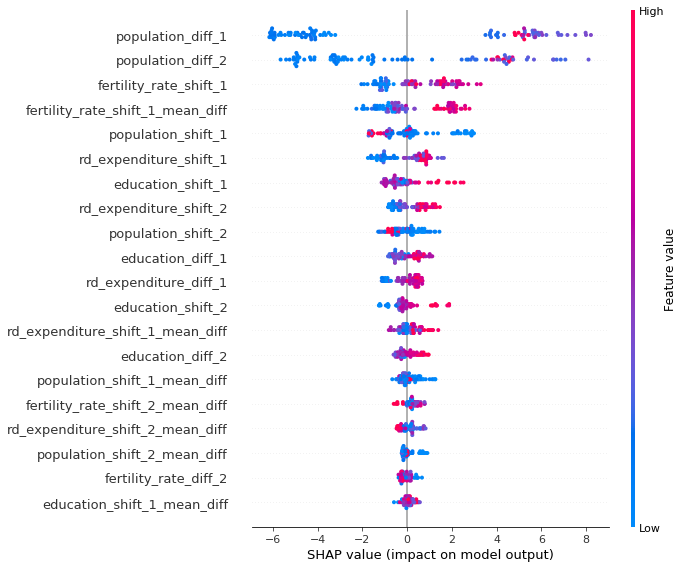

In [23]:
shap.summary_plot(shap_values, x_test)

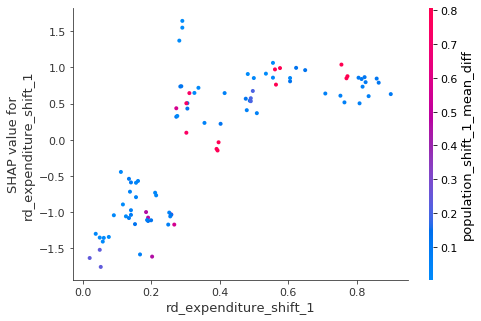

In [24]:
shap.dependence_plot('rd_expenditure_shift_1', shap_values, x_test)

## ExplainableBoostingRegressor (from InterpretML)

EBM is a generalized additive model formalized as follows.

$$
g(E[y]) = \beta_0 + \sum f_j(x_j) + \sum f_{ij}(x_i,x_j)
$$

EBM learns the best feature function $f_j$ for each feature to show how each feature contributes to the model's prediction for the problem. EBM can also automatically detect and include pairwise interaction terms.

Paper: https://arxiv.org/pdf/1909.09223.pdf

### Global Explanation

In [27]:
from sklearn.model_selection import train_test_split
import interpret
from interpret.glassbox import ExplainableBoostingRegressor

train_temp = train_df[columns_to_fit + ['per_hour_worked']].dropna()
test_temp = test_df[columns_to_fit + ['per_hour_worked']].dropna()
x_train, y_train = train_temp[columns_to_fit], train_temp[['per_hour_worked']]
x_test, y_test = test_temp[columns_to_fit], test_temp[['per_hour_worked']]

ebm = ExplainableBoostingRegressor(random_state=42)
ebm.fit(x_train, y_train)

ebm_global = ebm.explain_global(name='EBM')
interpret.show(ebm_global)

<!-- http://127.0.0.1:7327/5232354512/ -->

### Local Explanation

In [28]:
ebm_local = ebm.explain_local(x_test[:5], y_test[:5], name='EBM')
interpret.show(ebm_local)

<!-- http://127.0.0.1:7327/5256374480/ -->

In [29]:
from interpret.glassbox import LinearRegression
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(x_test, y_test, name='Linear Regression')
interpret.show(ebm_perf)

<!-- http://127.0.0.1:7327/5256373584/ -->